#Anova test one way

In [3]:
# Performance when each of the engine
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]


In [5]:
from scipy.stats import f_oneway
 
# Performance when each of the engine
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

f_oneway(performance1, performance2, performance3, performance4)

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

In [1]:
##two way test


In [4]:
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot: xlabel='Genotype', ylabel='value'>

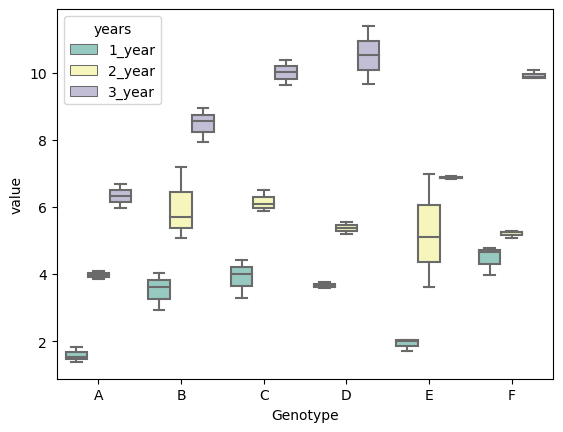

In [5]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/factorplots.py:131: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (values, group) in enumerate(plot_data.groupby(['trace'])):


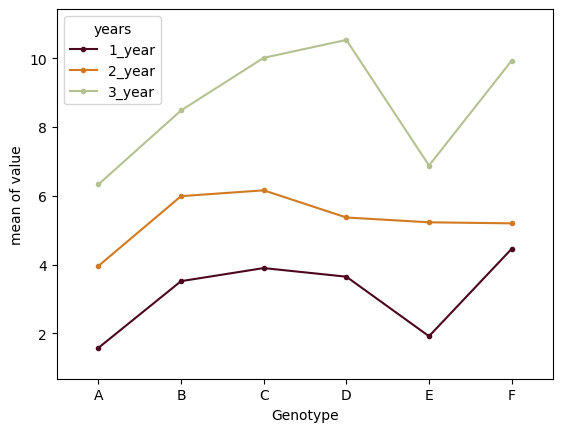

In [19]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()